In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv('vaccination_tweets.csv')

In [7]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum()


id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [10]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [12]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [13]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [14]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [15]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
text_df.text = text_df['text'].apply(data_processing)

In [18]:
text_df = text_df.drop_duplicates('text')

In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [21]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [22]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [23]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [24]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [25]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [26]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [27]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [28]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)


In [29]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<ipython-input-30-382eb7a84e29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=text_df, palette=colors)


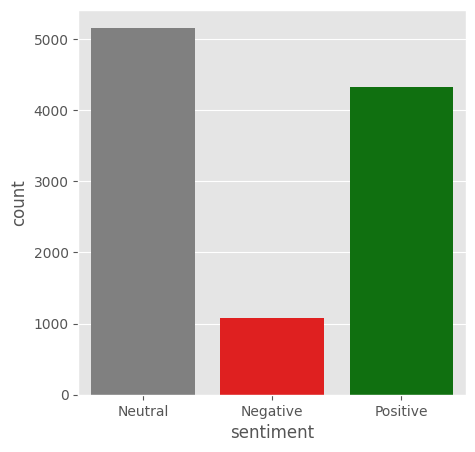

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'text_df' DataFrame and 'sentiment' column are defined earlier
colors = {'Negative': 'red', 'Neutral': 'grey', 'Positive': 'green'}

# Create a count plot with specified colors
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', data=text_df, palette=colors)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Distribution of sentiments')

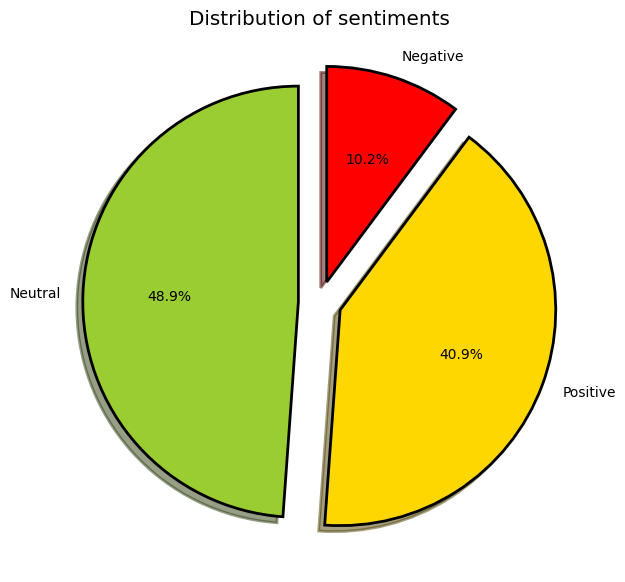

In [31]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [32]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


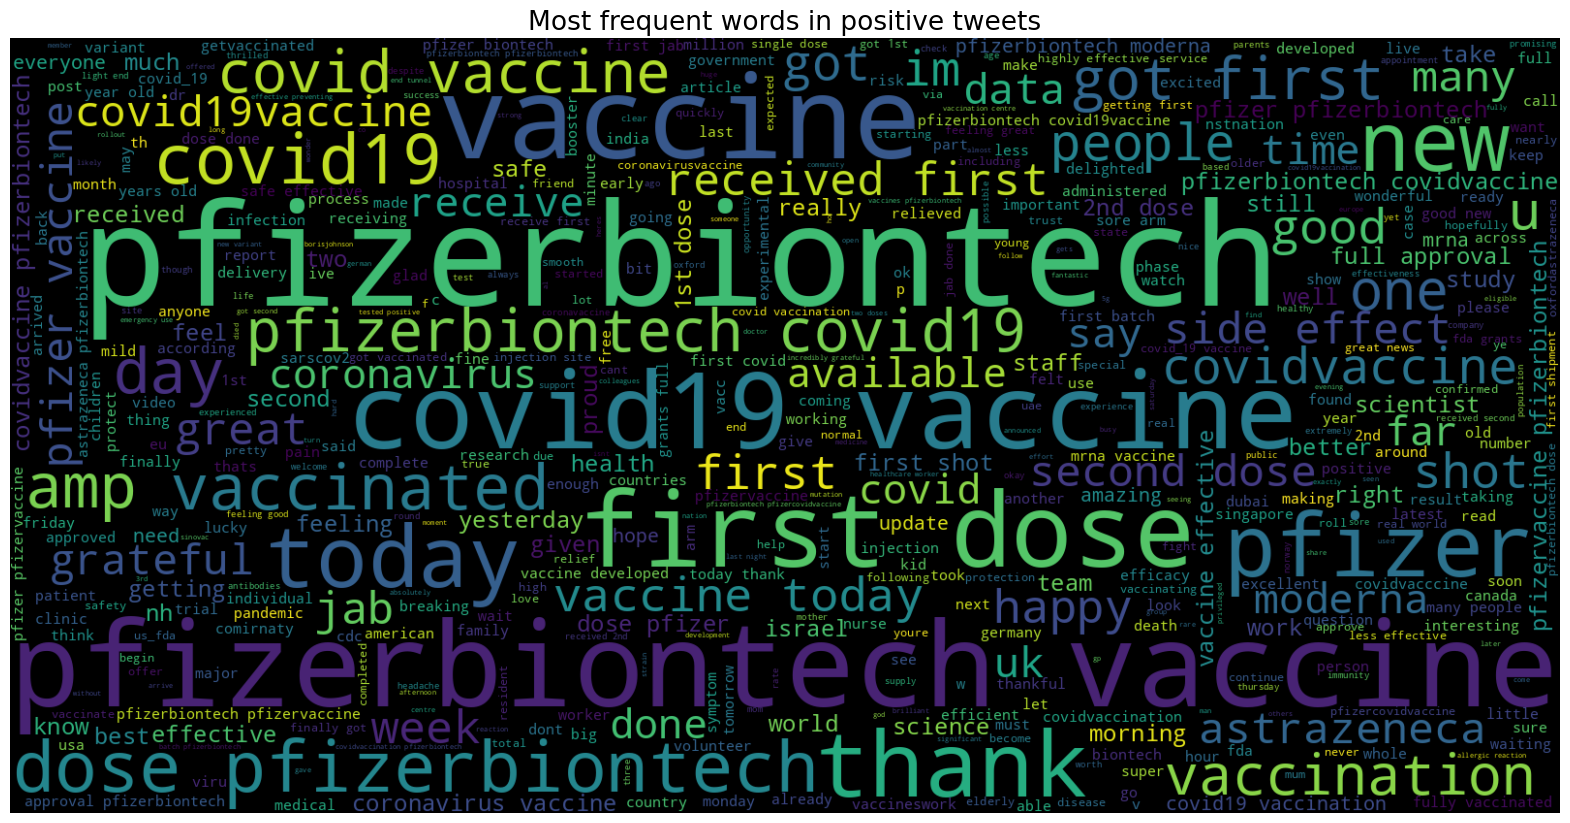

In [33]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [34]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


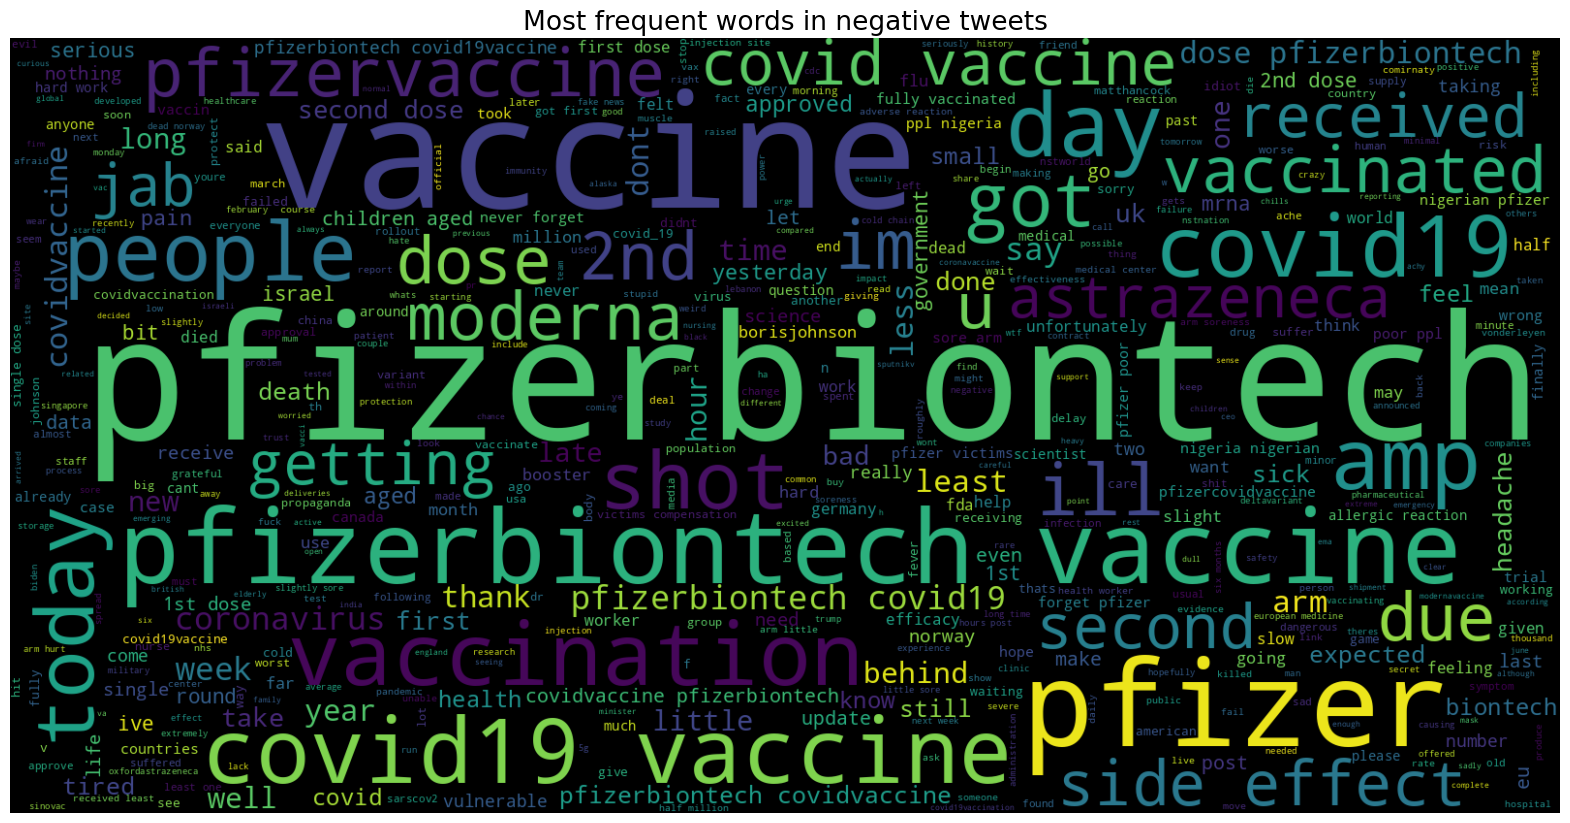

In [35]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [36]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


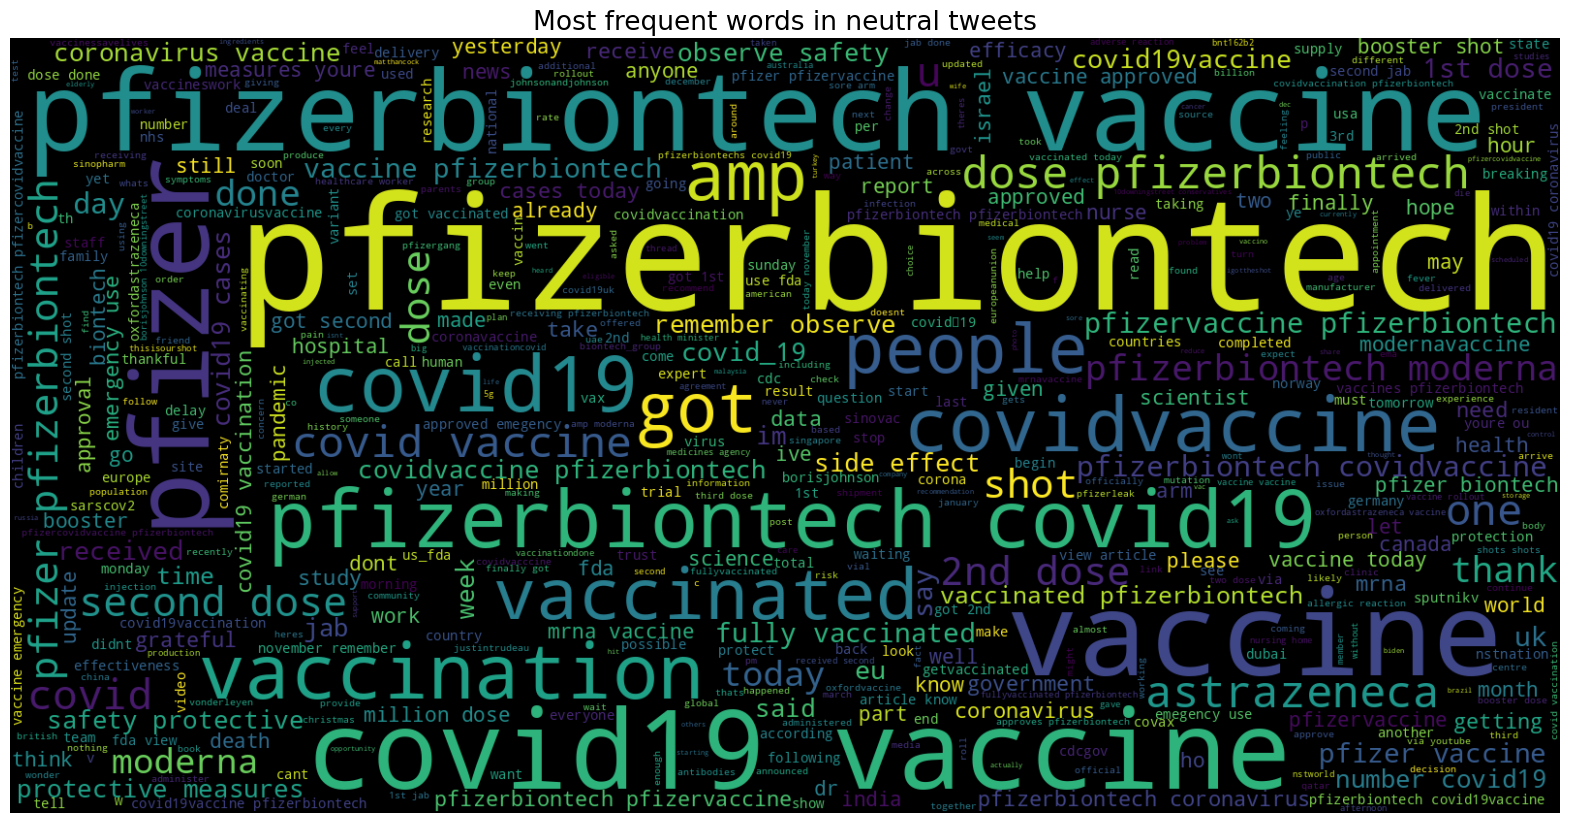

In [37]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [38]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming text_df is your DataFrame and 'text' is the column containing text data
corpus = text_df['text'].tolist()

# Create and fit the CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(corpus)

# Get feature names
feature_names = vect.get_feature_names_out()

# Print information about features
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 16792

First 20 features:
 ['000' '0000001' '0011' '004' '01' '01aug2021' '02' '02012021' '024' '03'
 '04' '040120' '045' '05' '05trial' '06' '062021' '062121' '07' '07042021']


In [40]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [42]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8434, 16792)
Size of y_train: (8434,)
Size of x_test: (2109, 16792)
Size of y_test: (2109,)


In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy of LOGISTIC REGRESSION : {:.2f}%".format(logreg_acc*100))

Test accuracy of LOGISTIC REGRESSION : 88.19%


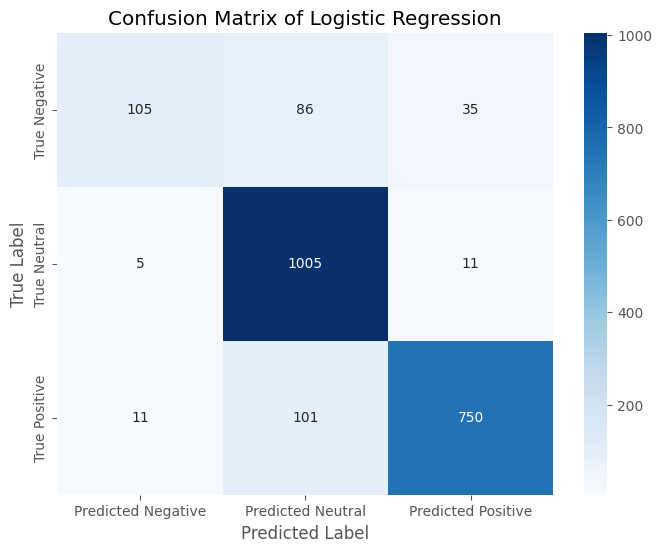


 Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.46      0.61       226
     Neutral       0.84      0.98      0.91      1021
    Positive       0.94      0.87      0.90       862

    accuracy                           0.88      2109
   macro avg       0.88      0.77      0.81      2109
weighted avg       0.89      0.88      0.87      2109



In [45]:


conf_mat = confusion_matrix(y_test, logreg_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'])

plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("\n Classification Report:\n", classification_report(y_test, logreg_pred))


Best parameters: {'C': 10}
Test accuracy of Tuned Logistic Regression: 90.42%

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.57      0.69       226
     Neutral       0.88      0.99      0.93      1021
    Positive       0.95      0.90      0.92       862

    accuracy                           0.90      2109
   macro avg       0.90      0.82      0.85      2109
weighted avg       0.91      0.90      0.90      2109



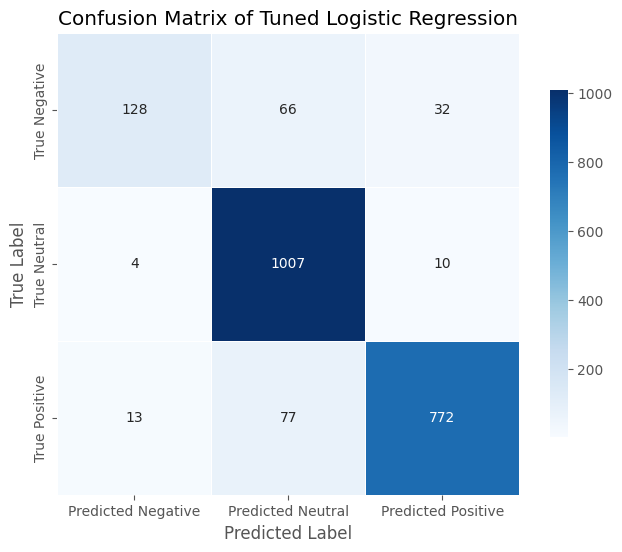

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

# Display best parameters
print("Best parameters:", grid.best_params_)

# Make predictions on the test set
y_pred = grid.predict(x_test)

# Calculate accuracy
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy of Tuned Logistic Regression: {:.2f}%".format(logreg_acc * 100))

# Confusion matrix and classification report
conf_mat = confusion_matrix(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a customized heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'],
            linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title('Confusion Matrix of Tuned Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



 Test accuracy of Naive Bayes: 76.86%

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.41      0.20      0.27       226
     Neutral       0.87      0.77      0.82      1021
    Positive       0.72      0.91      0.80       862

    accuracy                           0.77      2109
   macro avg       0.67      0.63      0.63      2109
weighted avg       0.76      0.77      0.75      2109



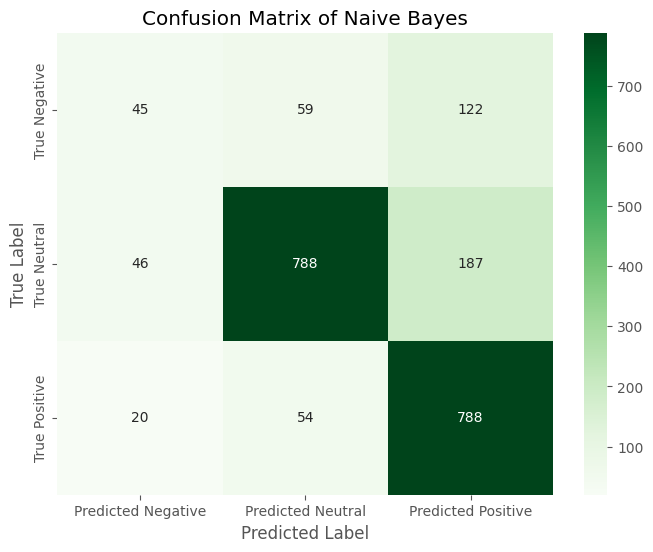

Test accuracy of Tuned Naive Bayes: 77.48%

Classification Report for Tuned Naive Bayes:
               precision    recall  f1-score   support

    Negative       0.75      0.01      0.03       226
     Neutral       0.78      0.88      0.83      1021
    Positive       0.76      0.84      0.80       862

    accuracy                           0.77      2109
   macro avg       0.77      0.58      0.55      2109
weighted avg       0.77      0.77      0.73      2109



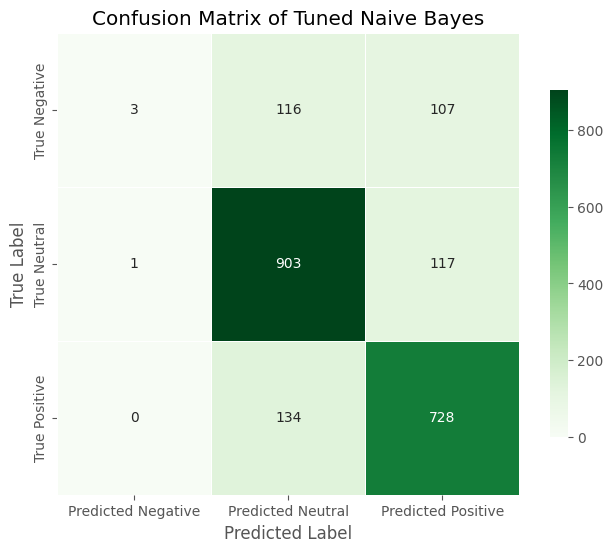

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Original Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

# Accuracy for Original Naive Bayes
nb_acc = accuracy_score(nb_pred, y_test)
print("\n Test accuracy of Naive Bayes: {:.2f}%".format(nb_acc * 100))

# Confusion matrix and classification report for Original Naive Bayes
conf_mat_nb = confusion_matrix(y_test, nb_pred)
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, nb_pred))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'])

plt.title('Confusion Matrix of Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuned Naive Bayes Model using GridSearchCV
param_grid_nb = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb)
grid_nb.fit(x_train, y_train)

# Display best parameters
#print("\nBest parameters for Naive Bayes:", grid_nb.best_params_)

# Make predictions on the test set using Tuned Naive Bayes
nb_pred_tuned = grid_nb.predict(x_test)

# Accuracy for Tuned Naive Bayes
nb_acc_tuned = accuracy_score(nb_pred_tuned, y_test)
print("Test accuracy of Tuned Naive Bayes: {:.2f}%".format(nb_acc_tuned * 100))

# Confusion matrix and classification report for Tuned Naive Bayes
conf_mat_nb_tuned = confusion_matrix(y_test, nb_pred_tuned)
print("\nClassification Report for Tuned Naive Bayes:\n", classification_report(y_test, nb_pred_tuned))

# Create a customized heatmap for the confusion matrix of Tuned Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'],
            linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title('Confusion Matrix of Tuned Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Original Decision Tree Test accuracy: 90.47%

Original Decision Tree Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.62      0.68       226
     Neutral       0.90      0.98      0.94      1021
    Positive       0.95      0.90      0.92       862

    accuracy                           0.90      2109
   macro avg       0.87      0.83      0.84      2109
weighted avg       0.90      0.90      0.90      2109



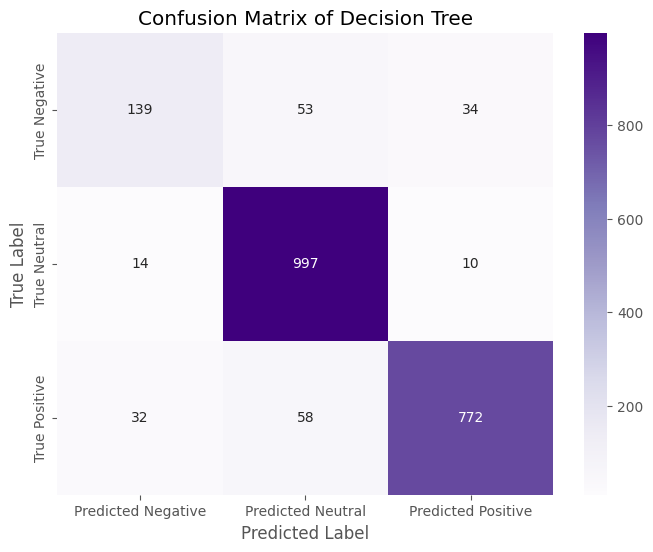


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test accuracy of Tuned Decision Tree: 90.52%

Classification Report for Tuned Decision Tree:
               precision    recall  f1-score   support

    Negative       0.76      0.61      0.67       226
     Neutral       0.90      0.98      0.94      1021
    Positive       0.94      0.89      0.92       862

    accuracy                           0.91      2109
   macro avg       0.87      0.83      0.84      2109
weighted avg       0.90      0.91      0.90      2109



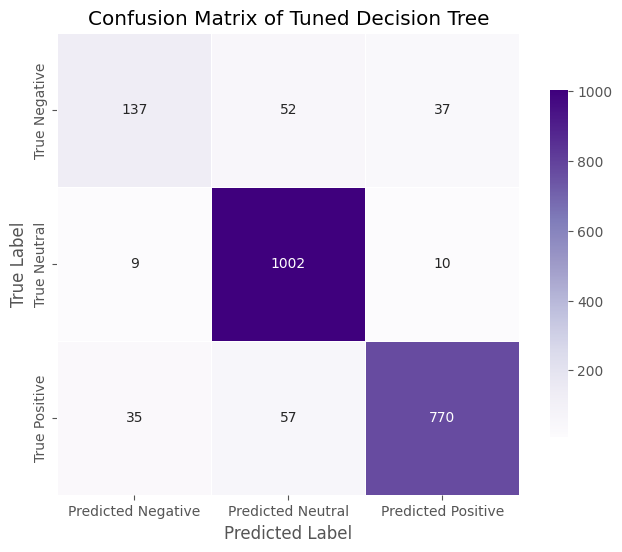

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Original Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# Accuracy for Original Decision Tree
dt_acc = accuracy_score(dt_pred, y_test)
print("\nOriginal Decision Tree Test accuracy: {:.2f}%".format(dt_acc * 100))

# Confusion matrix and classification report for Original Decision Tree
conf_mat_dt = confusion_matrix(y_test, dt_pred)
print("\nOriginal Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'])

plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuned Decision Tree Model using GridSearchCV
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt)
grid_dt.fit(x_train, y_train)

# Display best parameters
print("\nBest parameters for Decision Tree:", grid_dt.best_params_)

# Make predictions on the test set using Tuned Decision Tree
dt_pred_tuned = grid_dt.predict(x_test)

# Accuracy for Tuned Decision Tree
dt_acc_tuned = accuracy_score(dt_pred_tuned, y_test)
print("Test accuracy of Tuned Decision Tree: {:.2f}%".format(dt_acc_tuned * 100))

# Confusion matrix and classification report for Tuned Decision Tree
conf_mat_dt_tuned = confusion_matrix(y_test, dt_pred_tuned)
print("\nClassification Report for Tuned Decision Tree:\n", classification_report(y_test, dt_pred_tuned))

# Create a customized heatmap for the confusion matrix of Tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_dt_tuned, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'],
            linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title('Confusion Matrix of Tuned Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Original Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

# Accuracy for Original Random Forest
rf_acc = accuracy_score(rf_pred, y_test)
print("\nOriginal Random Forest Test accuracy: {:.2f}%".format(rf_acc * 100))

# Confusion matrix and classification report for Original Random Forest
conf_mat_rf = confusion_matrix(y_test, rf_pred)
print("\nOriginal Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'])

plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Tuned Random Forest Model using GridSearchCV
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
grid_rf.fit(x_train, y_train)

# Display best parameters
print("\nBest parameters for Random Forest:", grid_rf.best_params_)

# Make predictions on the test set using Tuned Random Forest
rf_pred_tuned = grid_rf.predict(x_test)

# Accuracy for Tuned Random Forest
rf_acc_tuned = accuracy_score(rf_pred_tuned, y_test)
print("Test accuracy of Tuned Random Forest: {:.2f}%".format(rf_acc_tuned * 100))

# Confusion matrix and classification report for Tuned Random Forest
conf_mat_rf_tuned = confusion_matrix(y_test, rf_pred_tuned)
print("\nClassification Report for Tuned Random Forest:\n", classification_report(y_test, rf_pred_tuned))

# Create a customized heatmap for the confusion matrix of Tuned Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Neutral', 'True Positive'],
            linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title('Confusion Matrix of Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
